# International COVID-19 Deaths

Data from:
https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590


In [244]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests


### Pull data from opendata.ecdc.europa.eu (European Center for Disease Prevention and Control)

In [245]:

url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Plot data

/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(-40, 50)

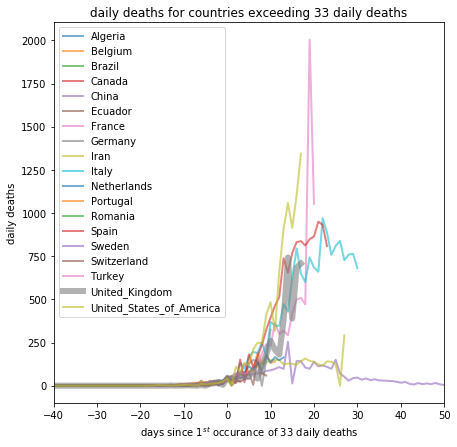

In [300]:
fig= plt.subplots(figsize=(7, 7))

daily_death_threshold = 33

for country in c.countriesAndTerritories.unique():
    c_country = c.loc[c['countriesAndTerritories'] == country]
    c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
    loc = np.where(c_country.deaths.values > daily_death_threshold)[0]
    if len(loc > 0):
        days = (c_country.date - c_country.iloc[loc[-1]].date).dt.days
        my_lw=2
        if country == 'United_Kingdom':
            my_lw=6
        plt.plot(days,c_country.deaths,label=country,lw=my_lw,alpha=0.6)

plt.legend(loc=2)
plt.title('daily deaths for countries exceeding '+str(daily_death_threshold)+' daily deaths')
plt.xlabel('days since 1$^{st}$ occurance of '+str(daily_death_threshold)+' daily deaths')
plt.ylabel('daily deaths')
plt.xlim([-40,50])

/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


(-40, 0)

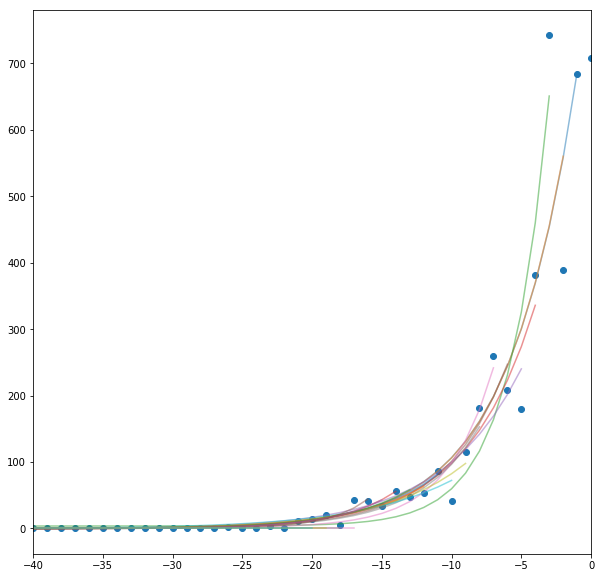

In [299]:
country = 'United_Kingdom'

from scipy.optimize import curve_fit

def func(x, a, c, d):
    return a*np.exp(c*x)+d


c_country = c.loc[c['countriesAndTerritories'] == country]
c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
days = (c_country.date - c_country.iloc[0].date).dt.days

fig= plt.subplots(figsize=(10, 10))

x,y=days.copy(),c_country.deaths.values.copy()
plt.scatter(x,y,label=country)

for i in (np.arange(20)+1):
    x,y=days[i::].copy(),c_country.deaths.values[i::].copy()
    popt, pcov = curve_fit(func, x, y)
    plt.plot(x, func(x, *popt),alpha=0.5, label="Fitted Curve")

plt.xlim([-40,0])

In [301]:
c_country

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date
8889,05/04/2020,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-04-05
8890,04/04/2020,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,2020-04-04
8891,03/04/2020,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-04-03
8892,02/04/2020,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-04-02
8893,01/04/2020,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,2020-04-01
8894,31/03/2020,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-03-31
8895,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-03-30
8896,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,2020-03-29
8897,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,2020-03-28
8898,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,2020-03-27
